In [ ]:
# default_exp gbe.rtt.reliability

# Risk Taking Task - Reliability

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
        </div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.rtt.data_provider import RTTDataProvider
import trr265.gbe.rtt.scoring as rtt_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")

## Test-retest reliability

### Based on percentage gambles

#### Win

R[write to console]: Loading required package: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.638,4.521,241.0,242.0,0.0,0.571,0.696,".64 (.57, .70)"
Single_random_raters,ICC2,0.638,4.537,241.0,241.0,0.0,0.571,0.697,".64 (.57, .70)"
Single_fixed_raters,ICC3,0.639,4.537,241.0,241.0,0.0,0.572,0.697,".64 (.57, .70)"
Average_raters_absolute,ICC1k,0.779,4.521,241.0,242.0,0.0,0.727,0.821,".78 (.73, .82)"
Average_random_raters,ICC2k,0.779,4.537,241.0,241.0,0.0,0.727,0.821,".78 (.73, .82)"
Average_fixed_raters,ICC3k,0.780,4.537,241.0,241.0,0.0,0.727,0.822,".78 (.73, .82)"


,variance,Percent
ID,0.067,0.638
Items,0.000,0.001
Residual,0.038,0.361
Total,0.105,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


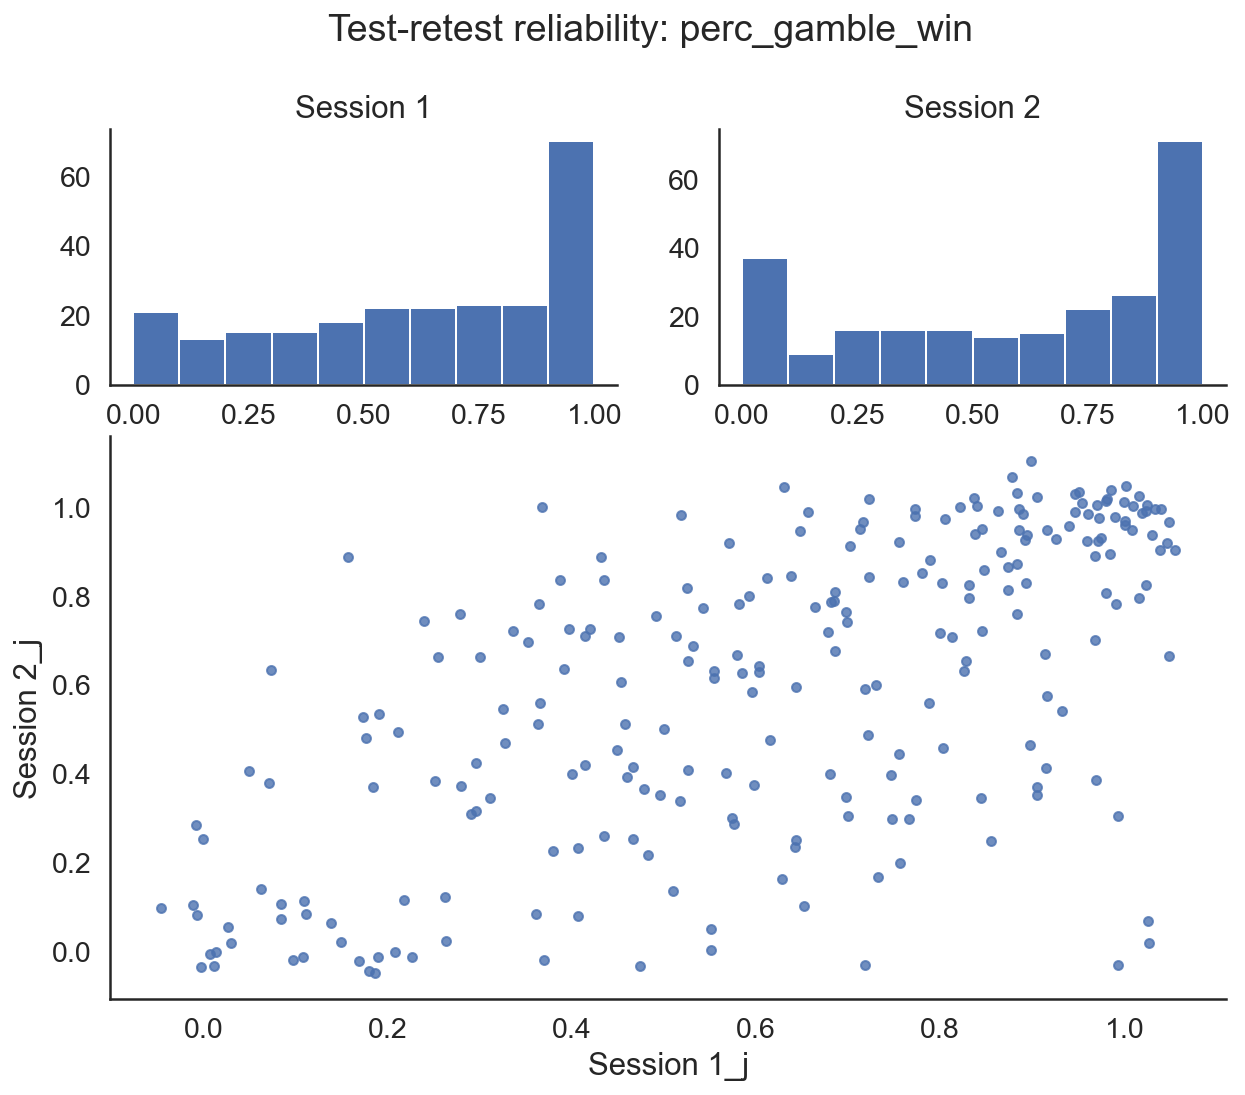

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.577,3.733,241.0,242.0,0.0,0.502,0.644,".58 (.50, .64)"
Single_random_raters,ICC2,0.584,4.026,241.0,241.0,0.0,0.497,0.657,".58 (.50, .66)"
Single_fixed_raters,ICC3,0.602,4.026,241.0,241.0,0.0,0.530,0.665,".60 (.53, .67)"
Average_raters_absolute,ICC1k,0.732,3.733,241.0,242.0,0.0,0.669,0.783,".73 (.67, .78)"
Average_random_raters,ICC2k,0.737,4.026,241.0,241.0,0.0,0.664,0.793,".74 (.66, .79)"
Average_fixed_raters,ICC3k,0.752,4.026,241.0,241.0,0.0,0.693,0.799,".75 (.69, .80)"


,variance,Percent
ID,0.053,0.584
Items,0.003,0.030
Residual,0.035,0.386
Total,0.090,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


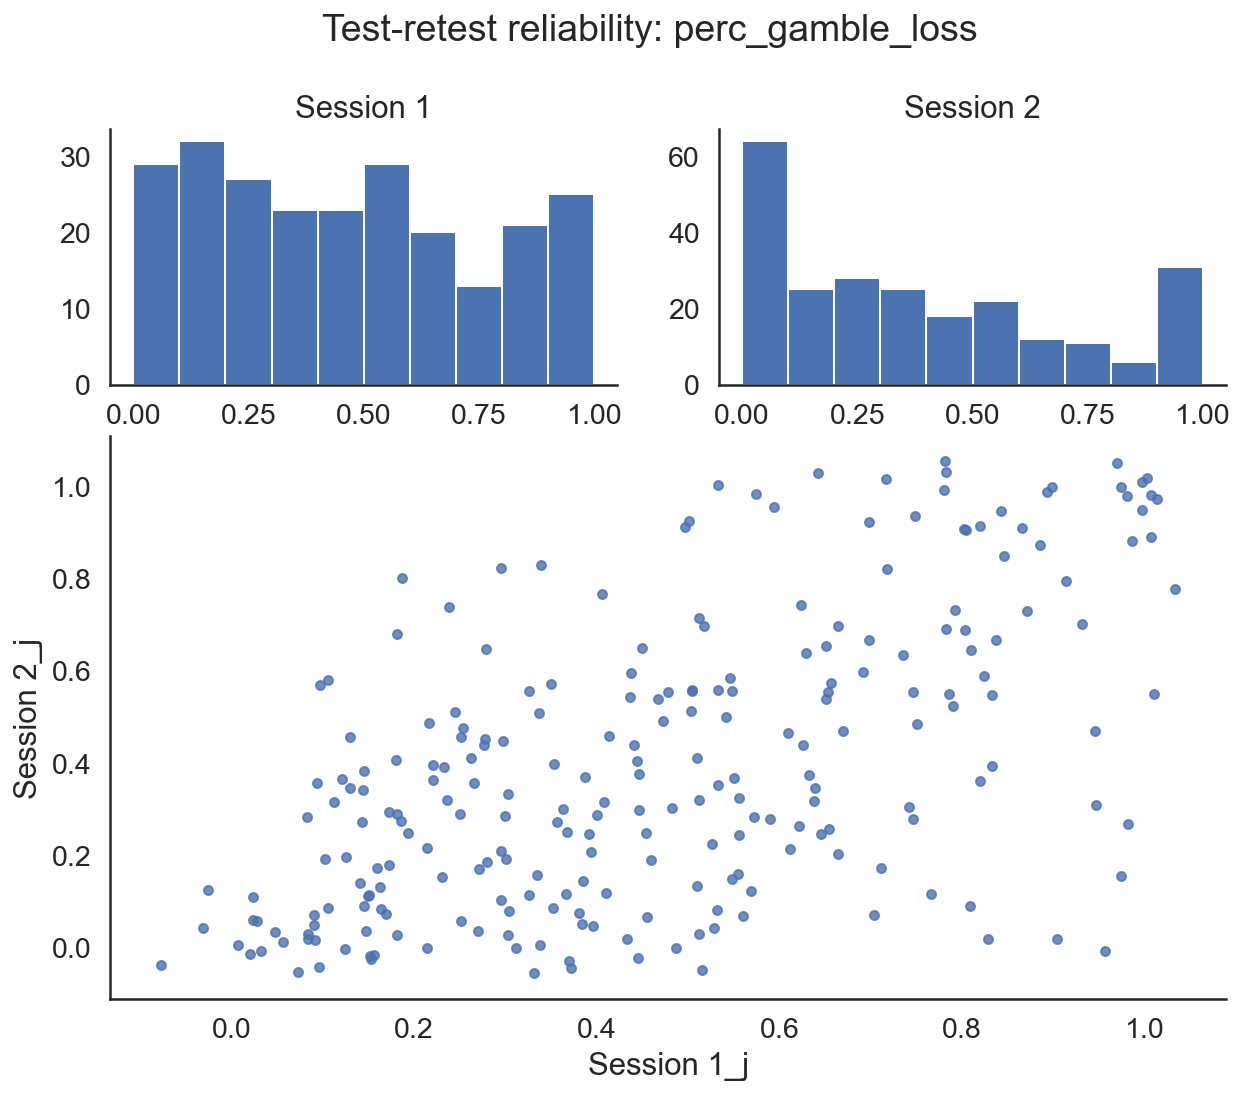

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.542,3.371,241.0,242.0,0.0,0.463,0.613,".54 (.46, .61)"
Single_random_raters,ICC2,0.545,3.467,241.0,241.0,0.0,0.465,0.616,".55 (.47, .62)"
Single_fixed_raters,ICC3,0.552,3.467,241.0,241.0,0.0,0.474,0.622,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.703,3.371,241.0,242.0,0.0,0.633,0.760,".70 (.63, .76)"
Average_random_raters,ICC2k,0.706,3.467,241.0,241.0,0.0,0.635,0.763,".71 (.64, .76)"
Average_fixed_raters,ICC3k,0.712,3.467,241.0,241.0,0.0,0.643,0.767,".71 (.64, .77)"


,variance,Percent
ID,0.050,0.545
Items,0.001,0.013
Residual,0.040,0.442
Total,0.091,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


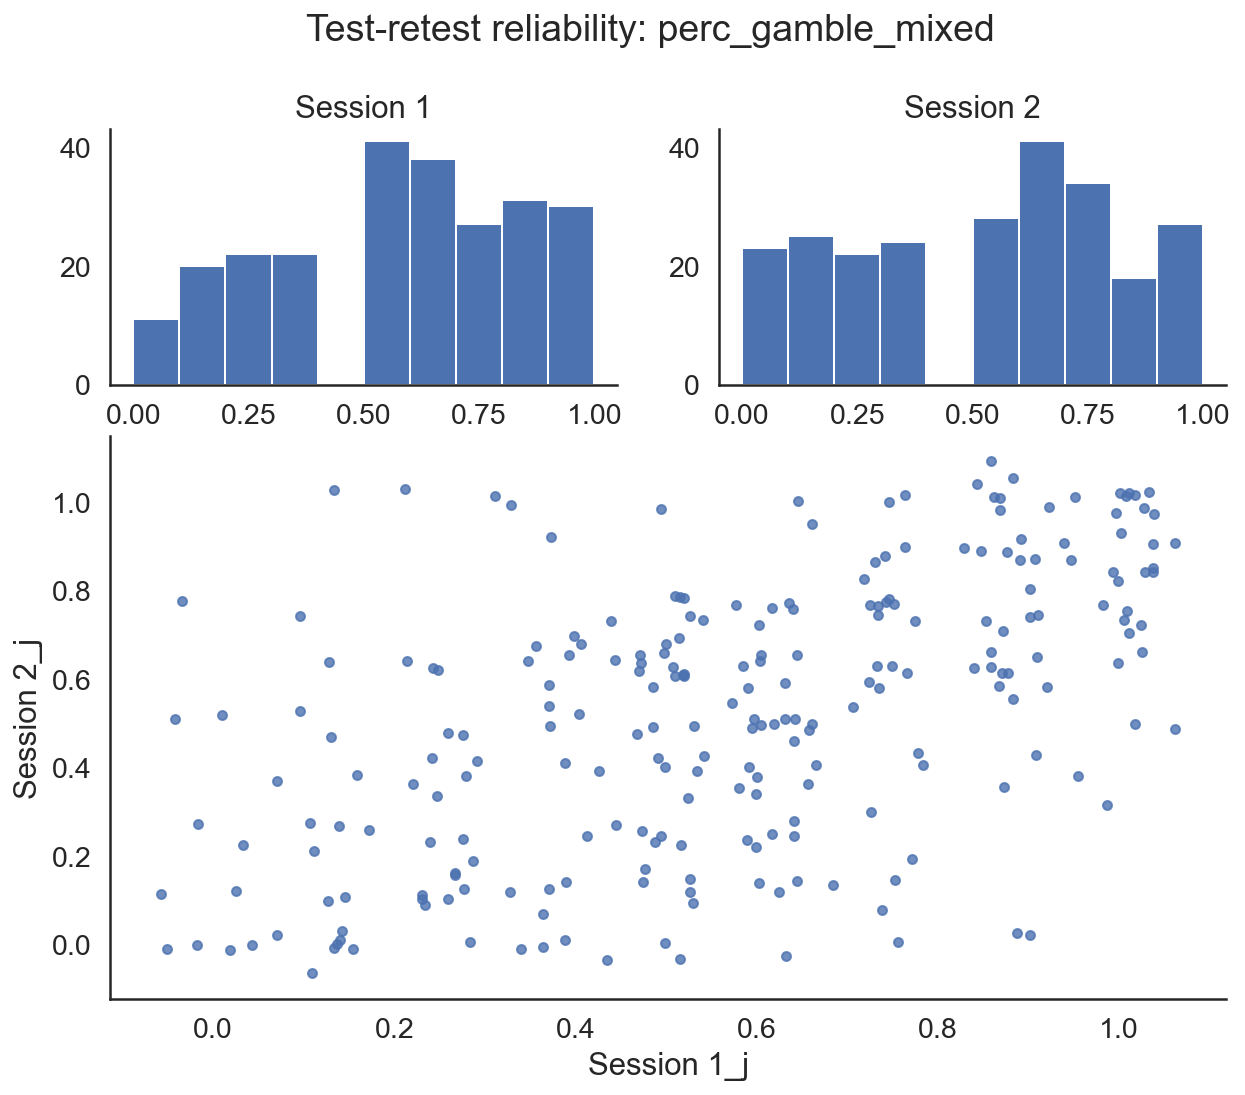

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_mixed', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_sep`).

#### Win

In [ ]:
_df = rtt_scoring.get_perc_gamble_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.630,4.400,241.0,242.0,0.0,0.561,0.689,".63 (.56, .69)"
Single_random_raters,ICC2,0.630,4.427,241.0,241.0,0.0,0.562,0.690,".63 (.56, .69)"
Single_fixed_raters,ICC3,0.631,4.427,241.0,241.0,0.0,0.563,0.691,".63 (.56, .69)"
Average_raters_absolute,ICC1k,0.773,4.400,241.0,242.0,0.0,0.719,0.816,".77 (.72, .82)"
Average_random_raters,ICC2k,0.773,4.427,241.0,241.0,0.0,0.719,0.816,".77 (.72, .82)"
Average_fixed_raters,ICC3k,0.774,4.427,241.0,241.0,0.0,0.721,0.817,".77 (.72, .82)"


,variance,Percent
ID,0.051,0.630
Items,0.000,0.002
Residual,0.030,0.368
Total,0.082,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


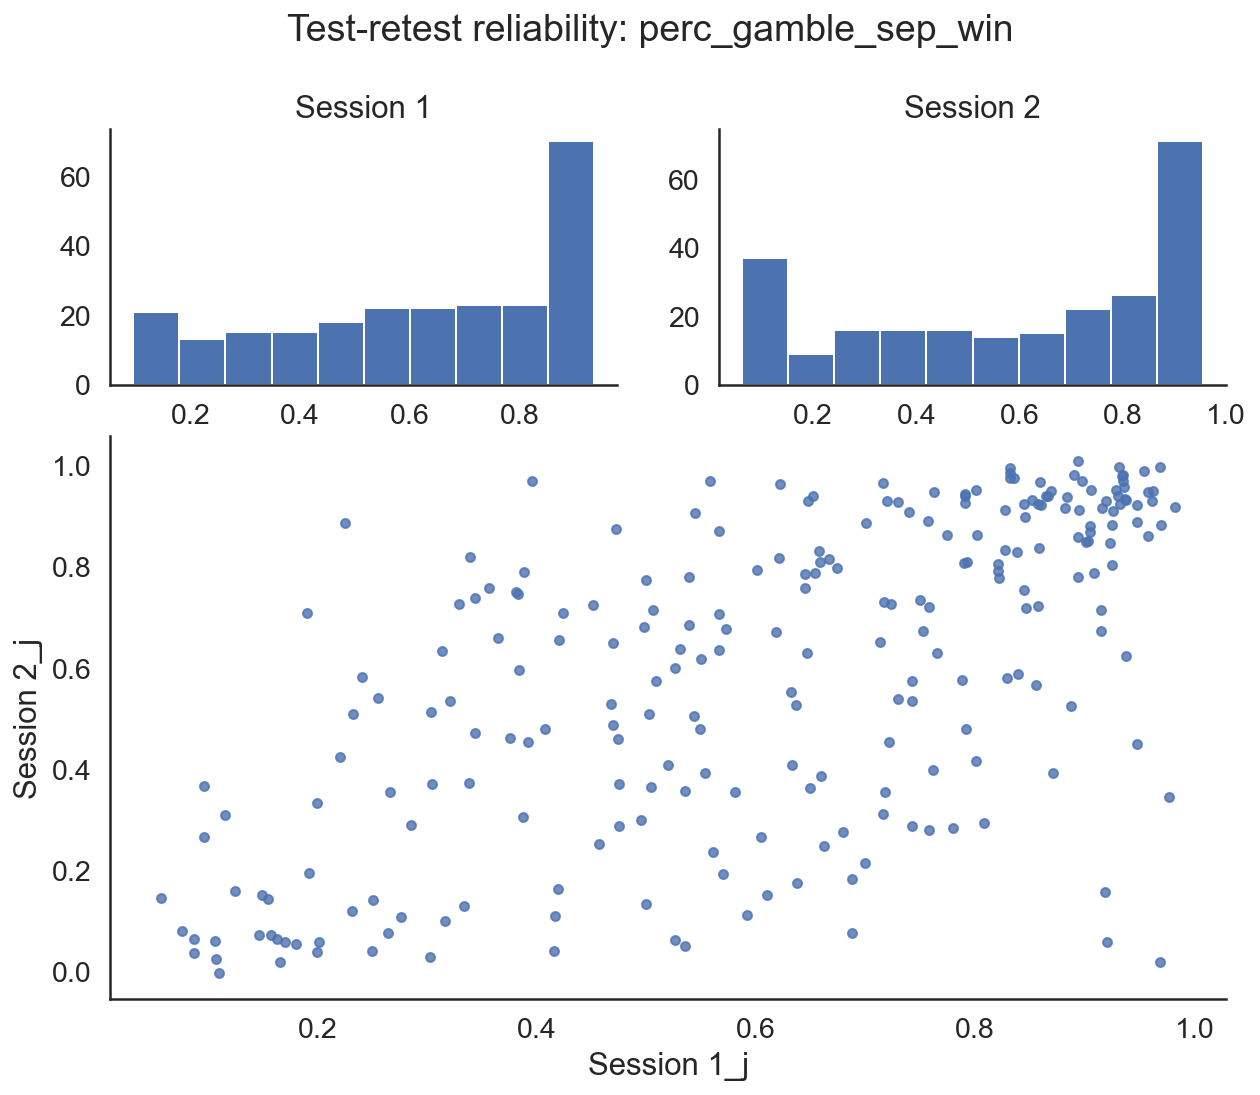

In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.552,3.468,241.0,242.0,0.0,0.474,0.622,".55 (.47, .62)"
Single_random_raters,ICC2,0.563,3.909,241.0,241.0,0.0,0.458,0.648,".56 (.46, .65)"
Single_fixed_raters,ICC3,0.593,3.909,241.0,241.0,0.0,0.519,0.657,".59 (.52, .66)"
Average_raters_absolute,ICC1k,0.712,3.468,241.0,242.0,0.0,0.644,0.767,".71 (.64, .77)"
Average_random_raters,ICC2k,0.721,3.909,241.0,241.0,0.0,0.628,0.787,".72 (.63, .79)"
Average_fixed_raters,ICC3k,0.744,3.909,241.0,241.0,0.0,0.684,0.793,".74 (.68, .79)"


,variance,Percent
ID,0.035,0.563
Items,0.003,0.049
Residual,0.024,0.387
Total,0.063,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


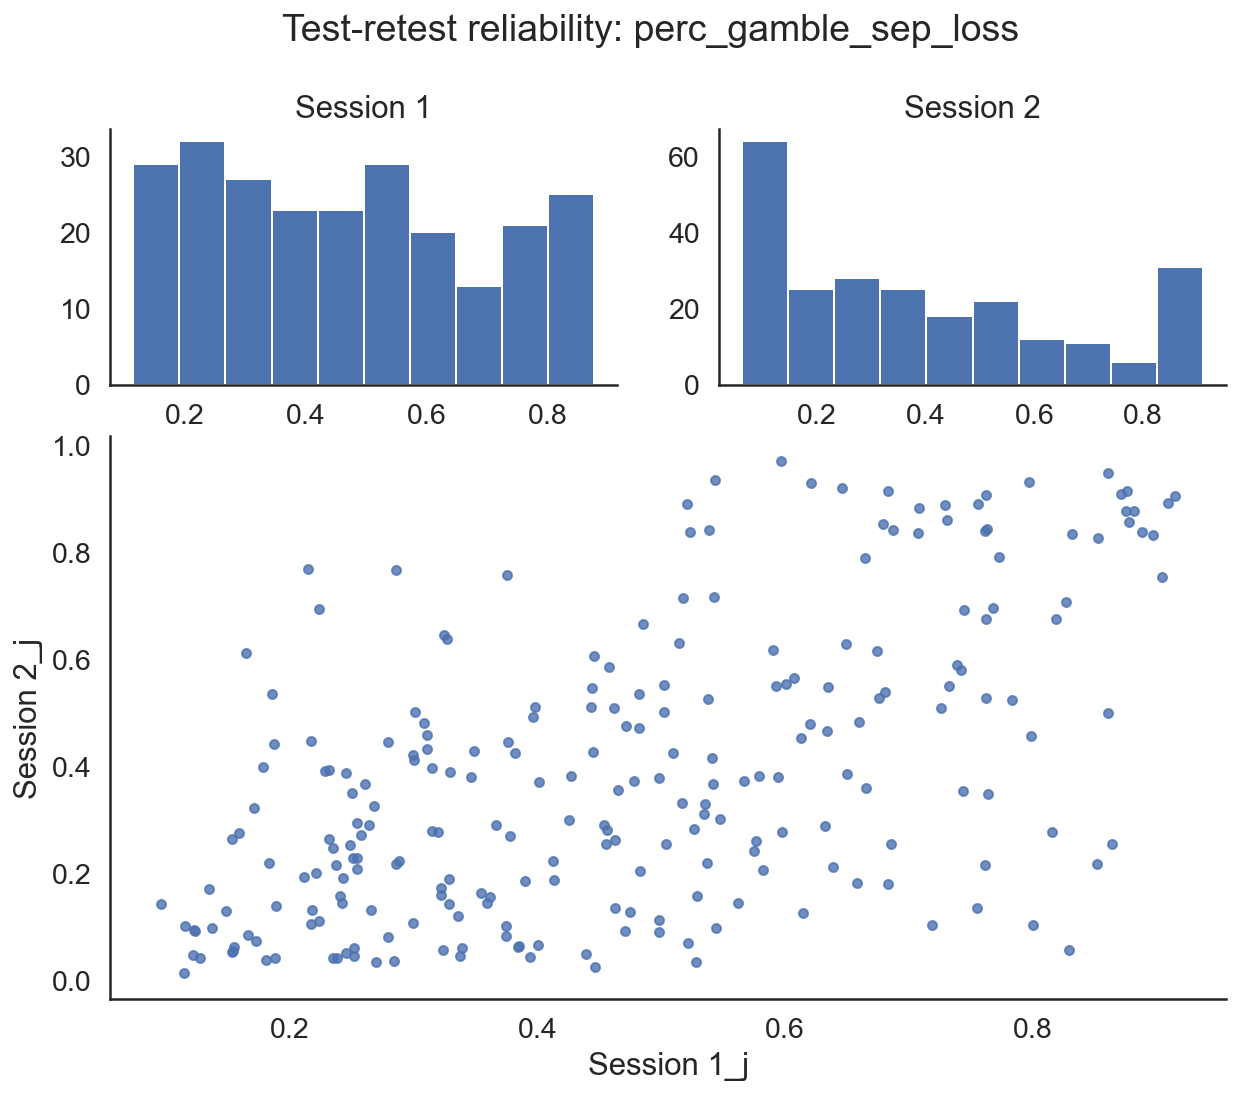

In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.525,3.212,241.0,242.0,0.0,0.444,0.598,".53 (.44, .60)"
Single_random_raters,ICC2,0.531,3.401,241.0,241.0,0.0,0.445,0.607,".53 (.44, .61)"
Single_fixed_raters,ICC3,0.546,3.401,241.0,241.0,0.0,0.467,0.616,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.689,3.212,241.0,242.0,0.0,0.615,0.748,".69 (.62, .75)"
Average_random_raters,ICC2k,0.694,3.401,241.0,241.0,0.0,0.616,0.755,".69 (.62, .76)"
Average_fixed_raters,ICC3k,0.706,3.401,241.0,241.0,0.0,0.636,0.762,".71 (.64, .76)"


,variance,Percent
ID,0.028,0.531
Items,0.001,0.026
Residual,0.023,0.443
Total,0.052,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


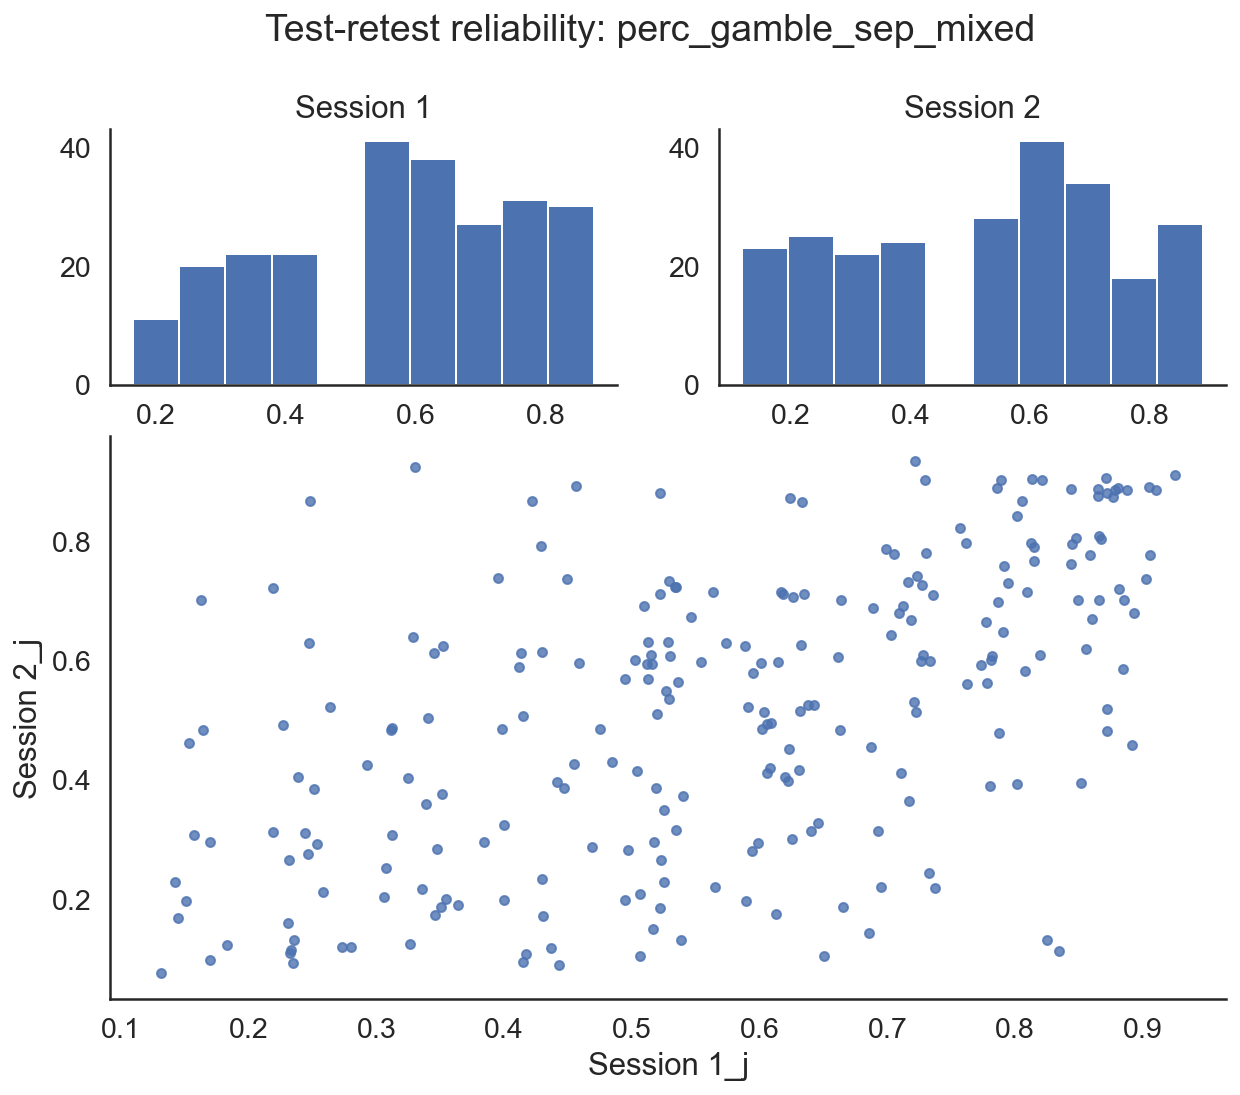

In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_mixed', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_joint`).

#### Win

In [ ]:
_df, ms = rtt_scoring.get_perc_gamble_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.805,9.263,241.0,242.0,0.0,0.765,0.839,".81 (.76, .84)"
Single_random_raters,ICC2,0.805,9.306,241.0,241.0,0.0,0.765,0.839,".81 (.76, .84)"
Single_fixed_raters,ICC3,0.806,9.306,241.0,241.0,0.0,0.765,0.840,".81 (.77, .84)"
Average_raters_absolute,ICC1k,0.892,9.263,241.0,242.0,0.0,0.867,0.913,".89 (.87, .91)"
Average_random_raters,ICC2k,0.892,9.306,241.0,241.0,0.0,0.867,0.913,".89 (.87, .91)"
Average_fixed_raters,ICC3k,0.893,9.306,241.0,241.0,0.0,0.867,0.913,".89 (.87, .91)"


,variance,Percent
ID,0.066,0.805
Items,0.000,0.001
Residual,0.016,0.194
Total,0.082,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


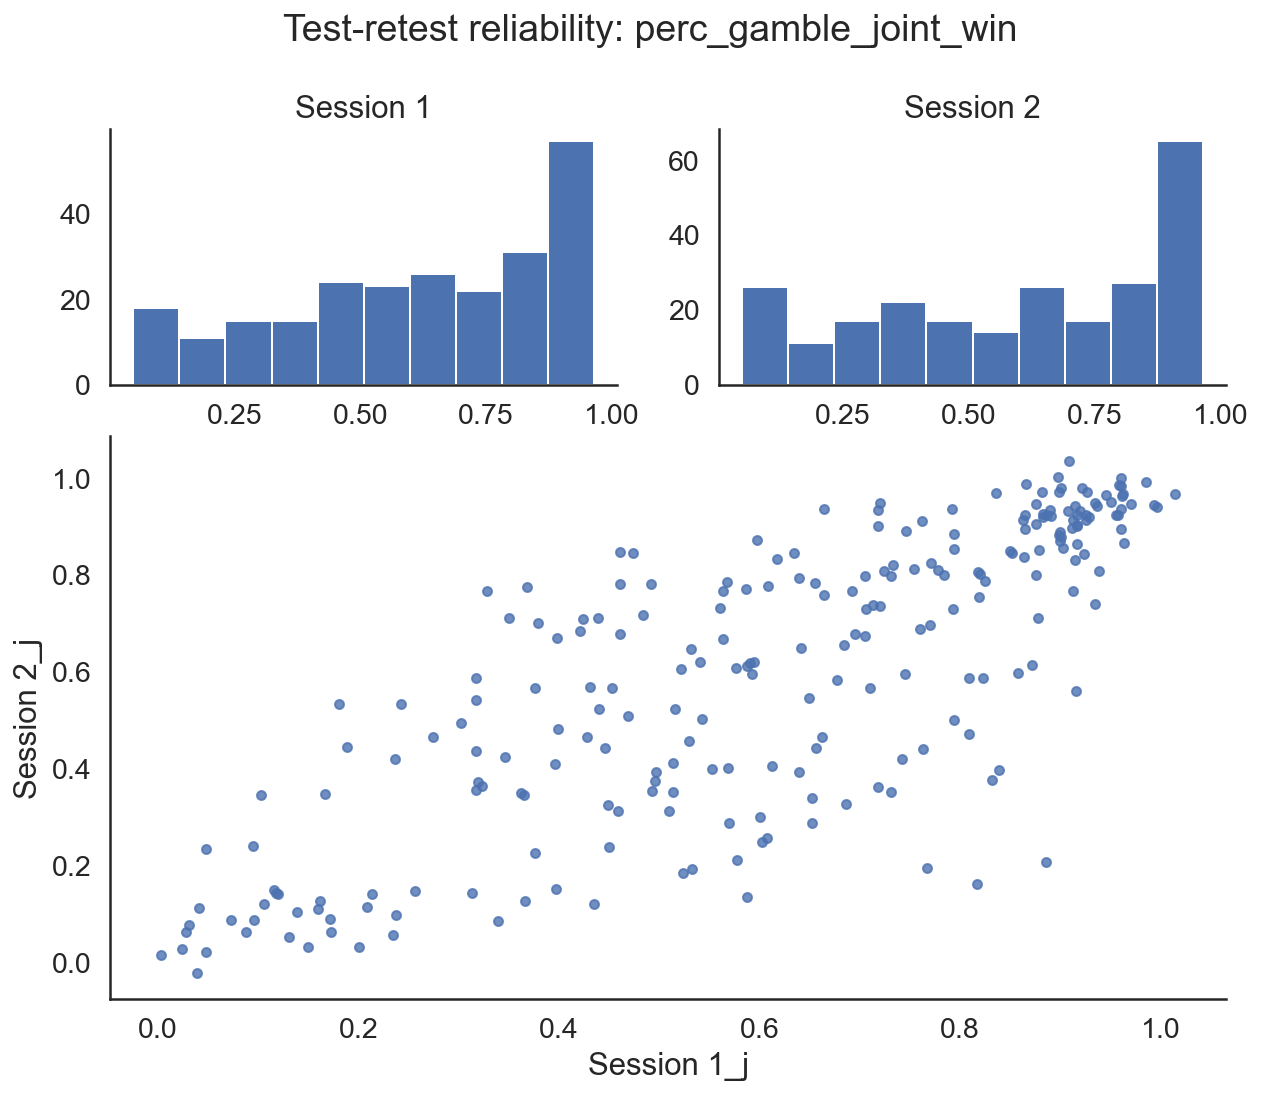

In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.797,8.844,241.0,242.0,0.0,0.755,0.832,".80 (.75, .83)"
Single_random_raters,ICC2,0.798,9.508,241.0,241.0,0.0,0.746,0.839,".80 (.75, .84)"
Single_fixed_raters,ICC3,0.810,9.508,241.0,241.0,0.0,0.770,0.843,".81 (.77, .84)"
Average_raters_absolute,ICC1k,0.887,8.844,241.0,242.0,0.0,0.860,0.909,".89 (.86, .91)"
Average_random_raters,ICC2k,0.888,9.508,241.0,241.0,0.0,0.854,0.913,".89 (.85, .91)"
Average_fixed_raters,ICC3k,0.895,9.508,241.0,241.0,0.0,0.870,0.915,".89 (.87, .91)"


,variance,Percent
ID,0.050,0.798
Items,0.001,0.014
Residual,0.012,0.188
Total,0.062,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


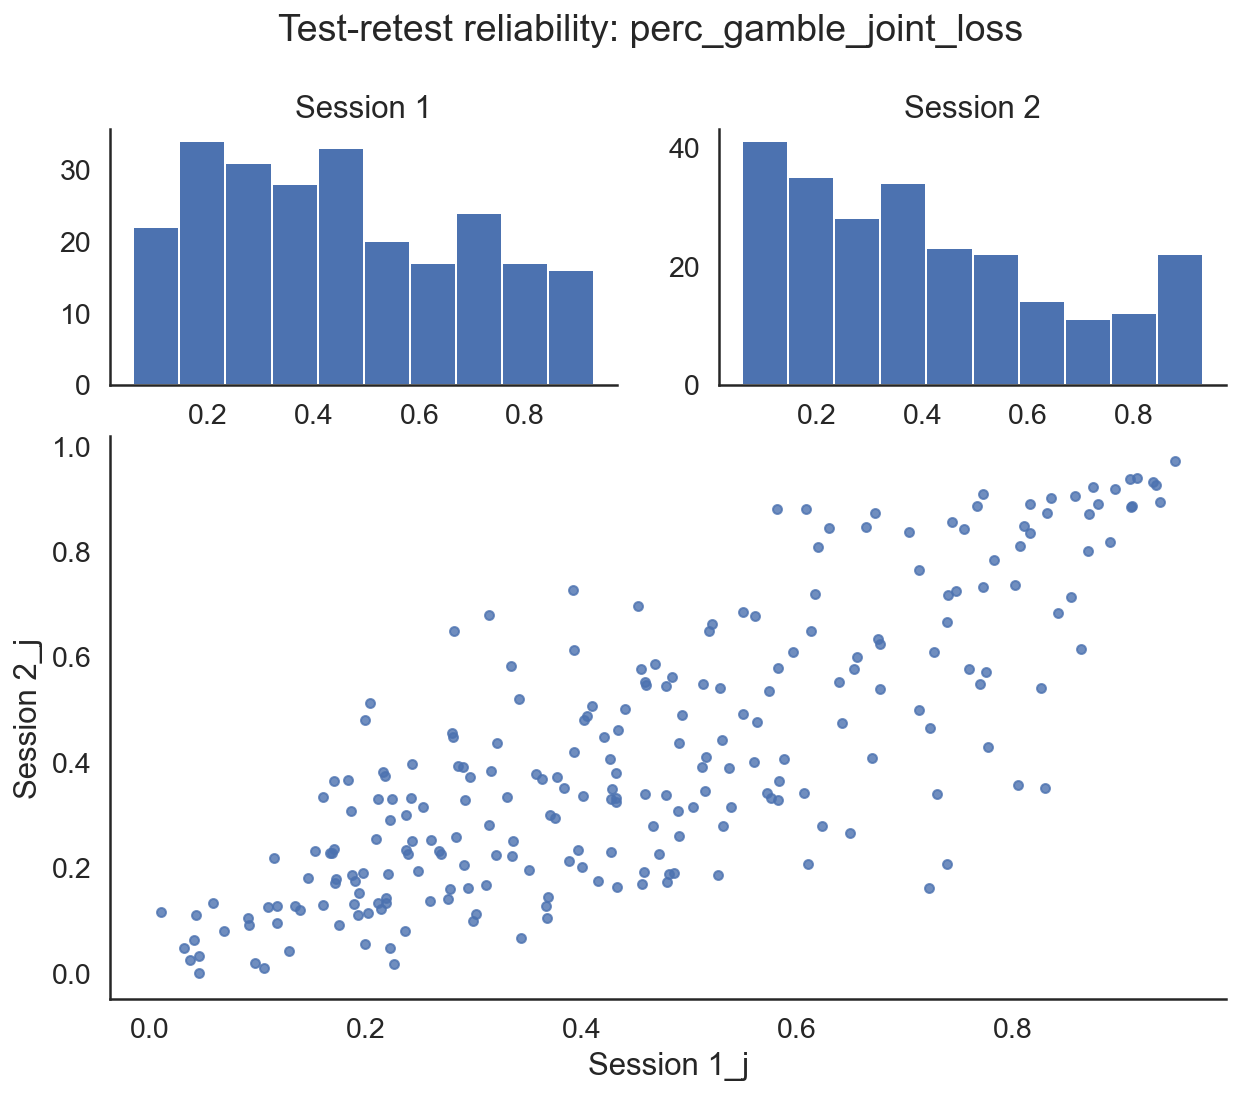

In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.851,12.463,241.0,242.0,0.0,0.820,0.878,".85 (.82, .88)"
Single_random_raters,ICC2,0.852,12.784,241.0,241.0,0.0,0.819,0.879,".85 (.82, .88)"
Single_fixed_raters,ICC3,0.855,12.784,241.0,241.0,0.0,0.824,0.881,".85 (.82, .88)"
Average_raters_absolute,ICC1k,0.920,12.463,241.0,242.0,0.0,0.901,0.935,".92 (.90, .94)"
Average_random_raters,ICC2k,0.920,12.784,241.0,241.0,0.0,0.900,0.936,".92 (.90, .94)"
Average_fixed_raters,ICC3k,0.922,12.784,241.0,241.0,0.0,0.903,0.937,".92 (.90, .94)"


,variance,Percent
ID,0.045,0.852
Items,0.000,0.004
Residual,0.008,0.145
Total,0.053,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


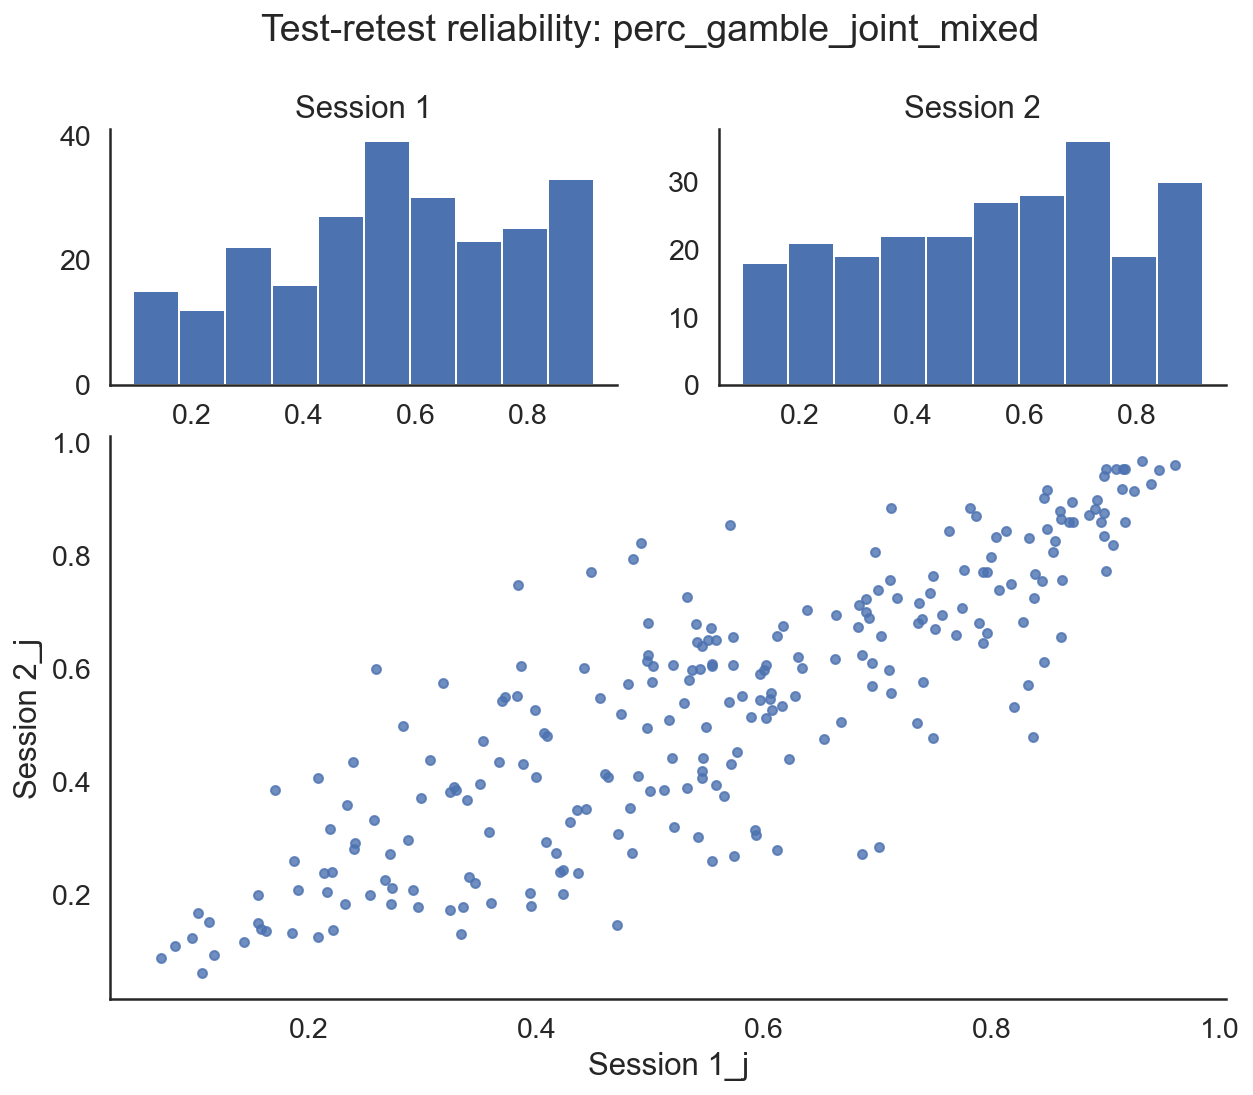

In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_mixed', add_jitter = True)

### Based on model-calculated variances

#### Win

In [ ]:
iccs_mod_win = stats.get_model_calculated_icc(ms['win'])
iccs_mod_win['icc']

R[write to console]: Loading required package: insight



0.7820300204318491

#### Loss

In [ ]:
iccs_mod_loss = stats.get_model_calculated_icc(ms['loss'])
iccs_mod_loss['icc']

0.7306685794528605

#### Win

In [ ]:
iccs_mod_mixed = stats.get_model_calculated_icc(ms['mixed'])
iccs_mod_mixed['icc']

0.7607750361326122

## Comparison of methods

### All methods

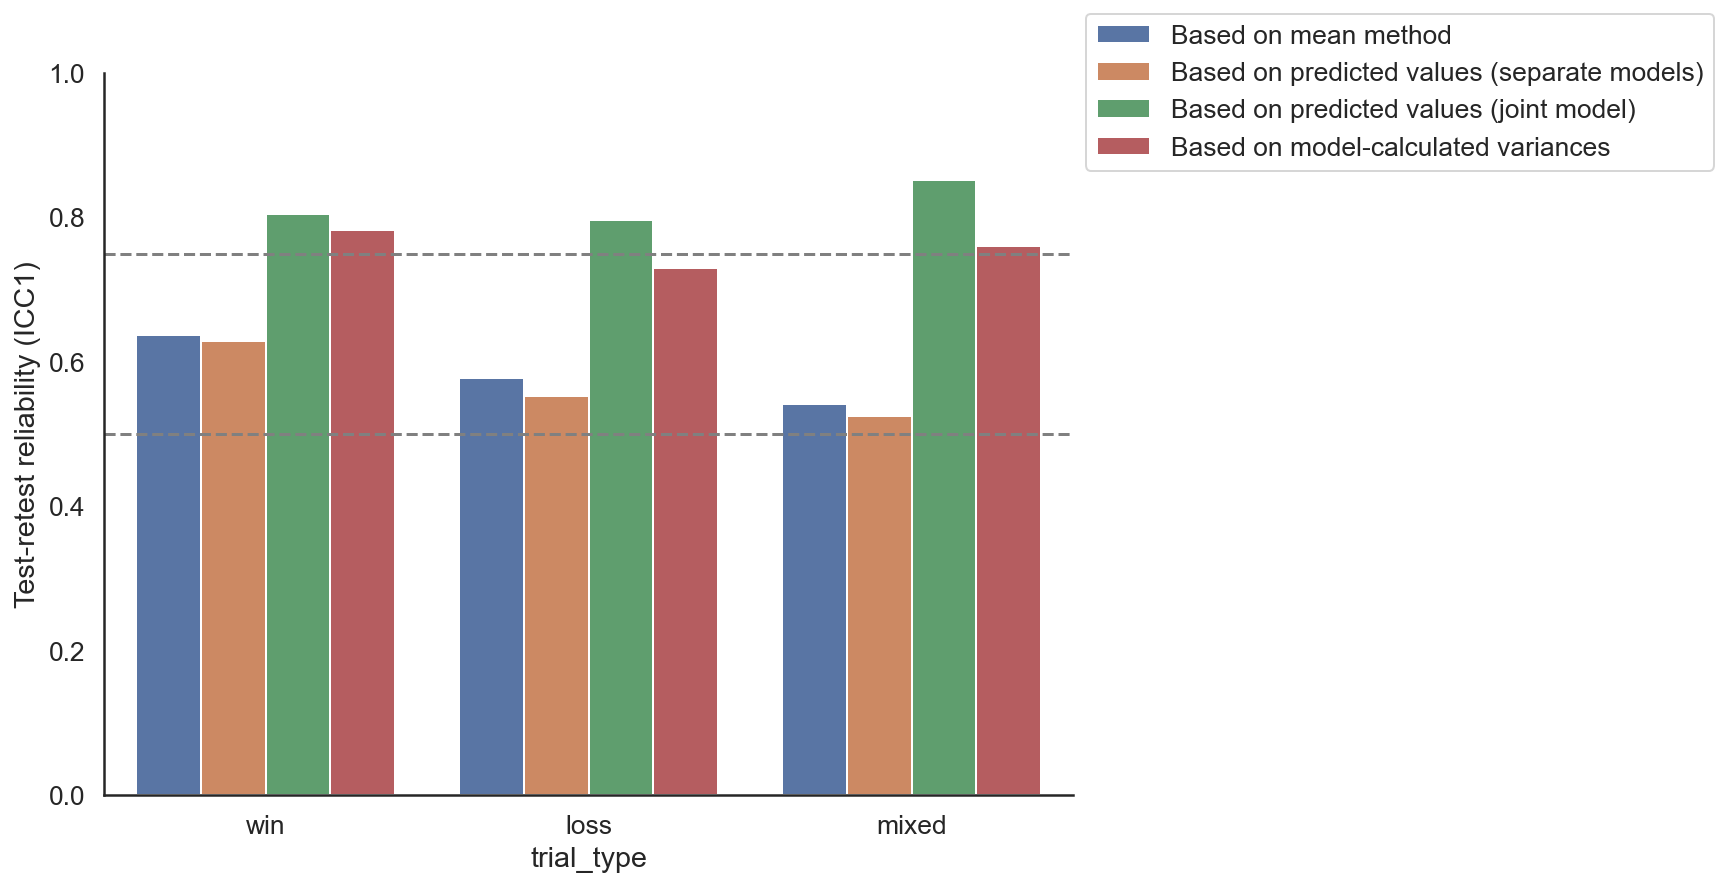

In [ ]:
iccs = {
    "Based on mean method_win": iccs_mean_win,
    "Based on mean method_loss": iccs_mean_loss,
    "Based on mean method_mixed": iccs_mean_mixed,
    "trial_sep_win": iccs_trial_sep_win,
    "trial_sep_loss": iccs_trial_sep_loss,
    "trial_sep_mixed": iccs_trial_sep_mixed,
    "trial_joint_win": iccs_trial_joint_win,
    "trial_joint_loss": iccs_trial_joint_loss,
    "trial_joint_mixed": iccs_trial_joint_mixed,
    "model_calc_win": iccs_mod_win,
    "model_calc_loss": iccs_mod_loss,
    "model_calc_mixed": iccs_mod_mixed
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

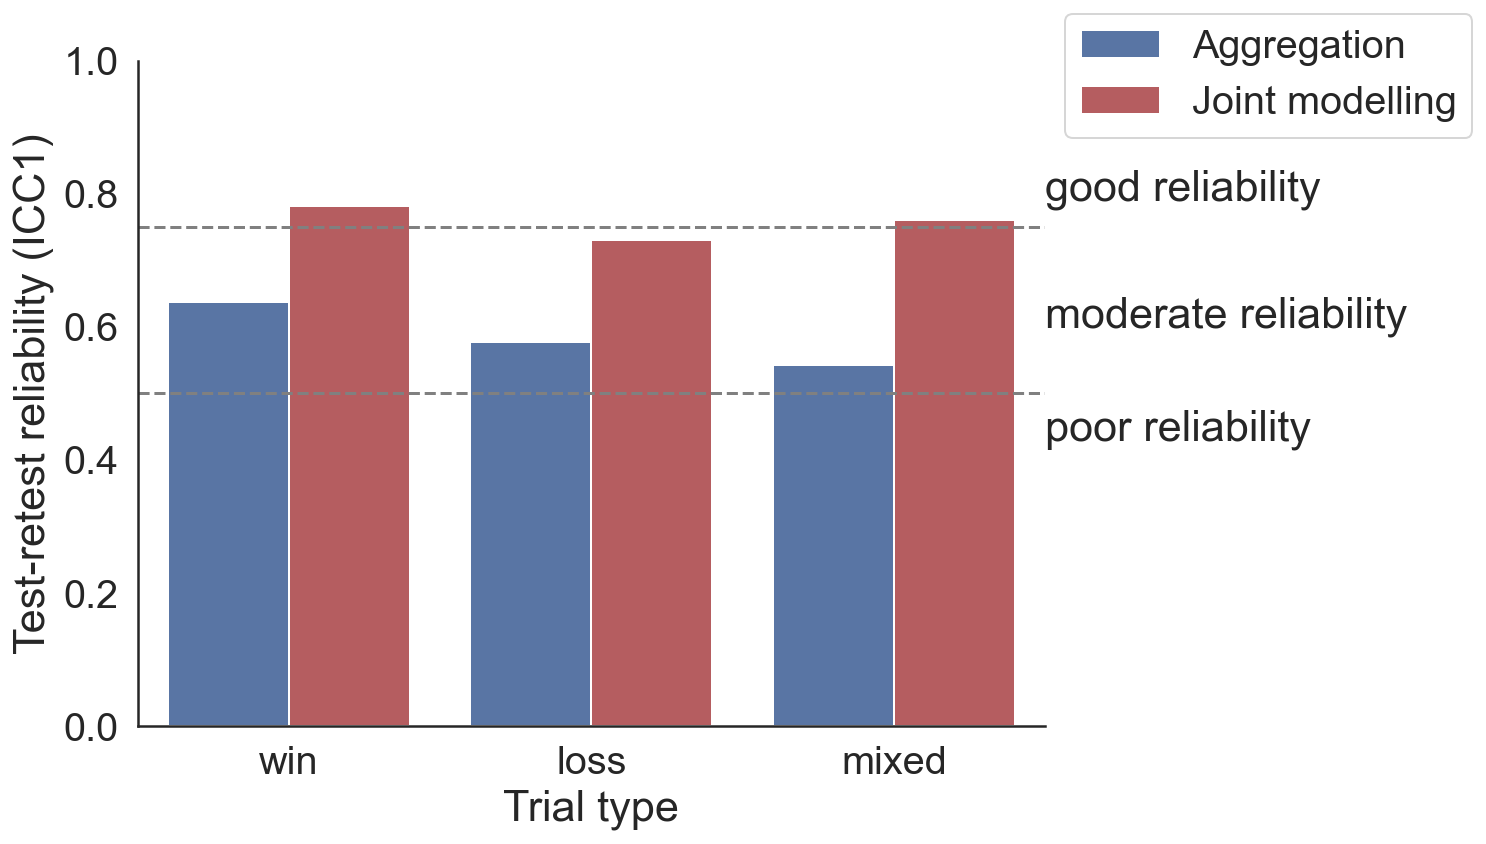

In [ ]:
iccs = {
    "Aggregation_win": iccs_mean_win,
    "Aggregation_loss": iccs_mean_loss,
    "Aggregation_mixed": iccs_mean_mixed,
    "Joint modelling_win": iccs_mod_win,
    "Joint modelling_loss": iccs_mod_loss,
    "Joint modelling_mixed": iccs_mod_mixed
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 2.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Trial type');


## Effect of time

In [ ]:
gbe = dp.get_gbe_data()

In [ ]:
scores = stats.get_scores(dp, dp.get_rtt_data, rtt_scoring.get_perc_gamble_predicted_joint)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular



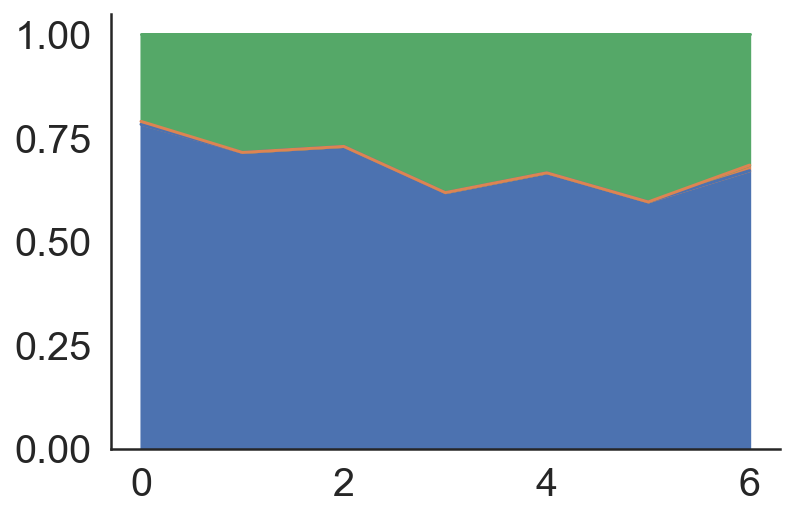

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_win")

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



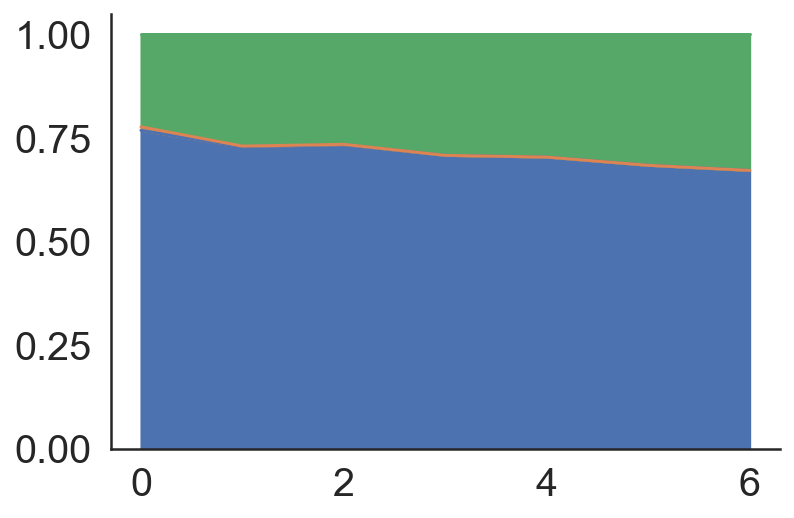

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss")

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



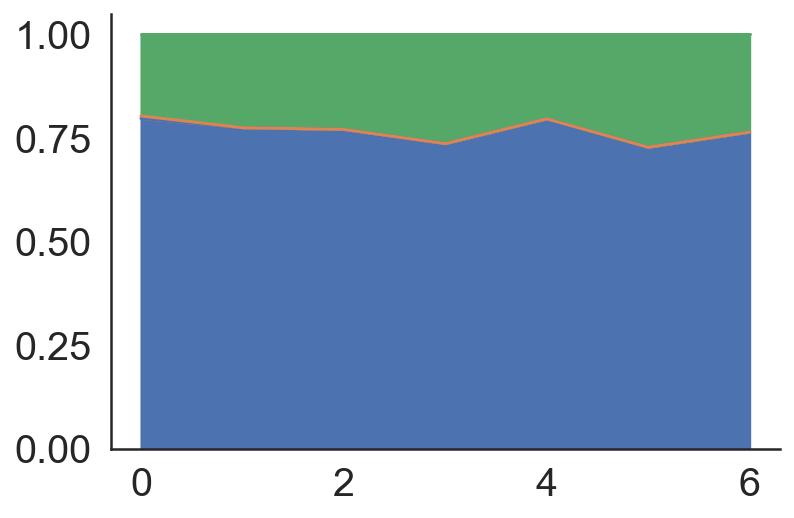

In [ ]:
stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed")

## Effect of time (percentage change)

In [ ]:
def analyze_reliability(df, dependent, add_jitter = False, title = '', silent = False):
    df['_session'] = df.session_number.apply(lambda x: "Session %d"%x)
    ssrt_reg = df.set_index(['participant','_session']).unstack()[dependent].dropna()
    iccs = get_psych_iccs(ssrt_reg)
    stats.describe_iccs(iccs,dependent, silent = silent)
    if not silent:
        fig = retest_plot(ssrt_reg, add_jitter)
        title = title if len(title) else "Test-retest reliability: %s"%dependent
        fig.suptitle(title);
        plt.show()
        return {'fig':fig, 'iccs':iccs}
    else:
        return {'fig':None, 'iccs':iccs}


def get_psych_iccs(df):
    """This function calculates ICCs using the psych package.
    """
    R = biuR.wrapper.R()
    R("""
    require(psych)
    options(warn=-1)
    result = ICC2(df)
    # Adding the quotes seems to be import because of glitch that leaks python globals into r
    iccs = result$"results"# -o iccs
    lmers = result$"lme"# -o lmers
    """, push = dict(df=df))
    iccs = R("""iccs""")
    lmers = R("""lmers""")

    return iccs,lmers

def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']


def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    display(df)
    if change:
        df = (df/df.iloc[0])*100
        display(df)
    ax = df[['participant','session','residual']].plot(legend = legend)
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)

### Win

In [ ]:
test = scores[['participant','session_number','perc_gamble_joint_win']].query('(session_number==1) or (session_number==3)').set_index(['participant','session_number']).unstack().reset_index()

In [ ]:
test.columns = test.columns.droplevel()
test
test.columns = ["participant","1","2"]

In [ ]:
test

,participant,1,2
0,b001,0.532391,0.751309
1,b002,0.911750,NaN
2,b012,0.609618,0.754195
3,b013,0.365916,0.222706
4,b015,0.423606,0.718572
...,...,...,...
275,m199,0.445550,0.739576
276,m202,0.864620,0.584424
277,m205,0.898440,0.948695
278,m235,0.868610,0.967484


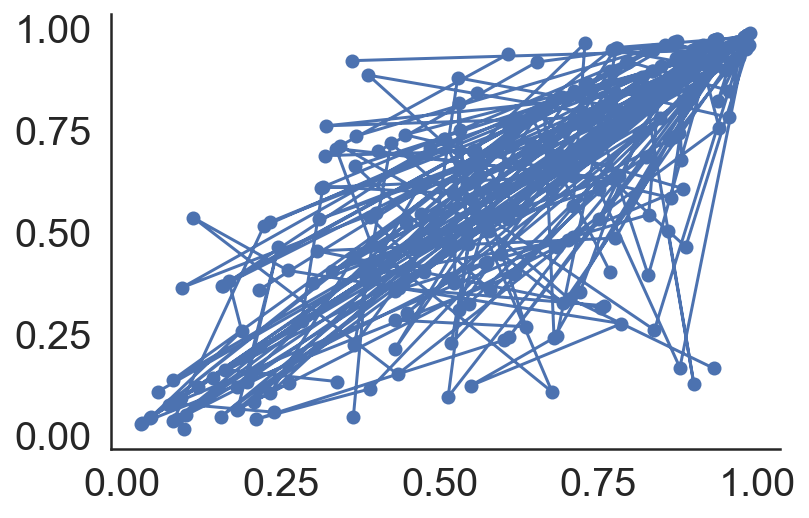

In [ ]:
plt.plot(test['1'], test['2'], '-', marker='o' )

In [ ]:
test.iloc[:5]

,participant,1,2
0,b001,0.532391,0.751309
1,b002,0.911750,NaN
2,b012,0.609618,0.754195
3,b013,0.365916,0.222706
4,b015,0.423606,0.718572


No handles with labels found to put in legend.


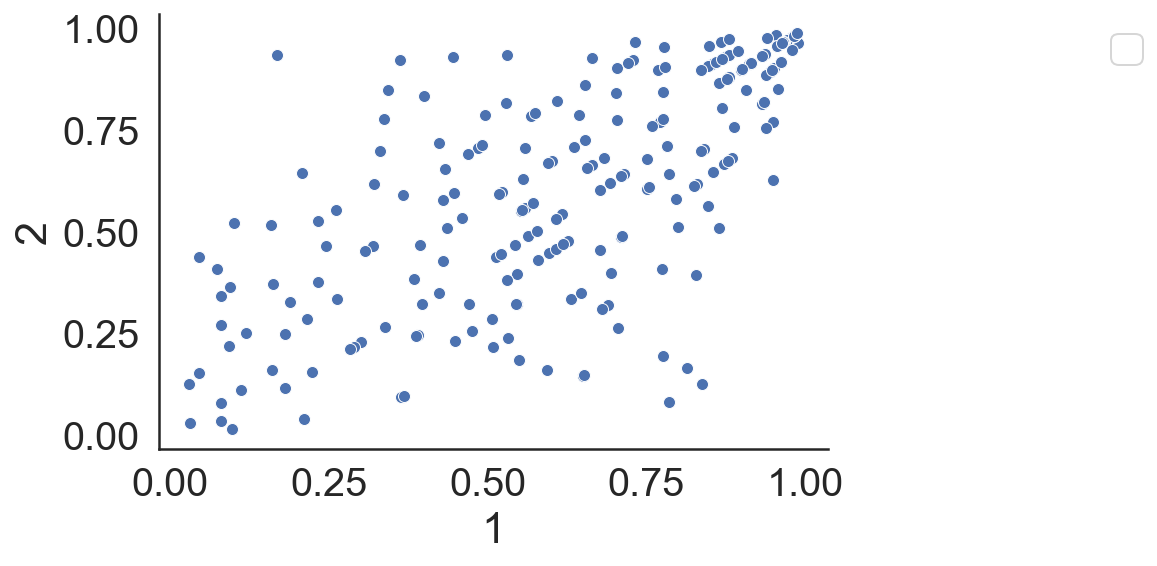

In [ ]:
sns.scatterplot(x = '1', y = '2', data = test, legend = False)
plt.legend(bbox_to_anchor = (1.5,1))

In [ ]:
tost = test.set_index('participant').stack().reset_index()
tost.columns = ['participant','session','value']
tost = tost.dropna()

In [ ]:
tost#.value.isna().mean()

,participant,session,value
0,b001,1,0.532391
1,b001,2,0.239591
2,b002,1,0.911750
3,b002,2,0.911750
4,b012,1,0.609618
...,...,...,...
510,m205,1,0.898440
511,m235,1,0.868610
512,m235,2,0.925075
513,m271,1,0.368091


In [ ]:
%%R -i tost
require(lmer)
control <- lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e10))
m = lmer(value ~ 1  + (1 | session), data = tost, control = control)
summary(m)


R[write to console]: Loading required package: lmer



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ 1 + (1 | session)
   Data: tost
Control: control

REML criterion at convergence: 132.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1726 -0.7756  0.1284  0.9182  1.3763 

Random effects:
 Groups   Name        Variance  Std.Dev.
 session  (Intercept) 2.704e-05 0.0052  
 Residual             7.484e-02 0.2736  
Number of obs: 515, groups:  session, 2

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  0.61155    0.01261 4.12505   48.51 7.62e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
optimizer (bobyqa) convergence code: 1 (bobyqa -- maximum number of function evaluations exceeded)
Model failed to converge with max|grad| = 0.402888 (tol = 0.002, component 1)
NAs introduced by coercion to integer range



In [ ]:
tost.set_index(['participant','session']).iloc[:10]#.unstack()

value
participant session          
b001        1        0.532391
            2        0.239591
b002        1        0.911750
            2        0.911750
b012        1        0.609618
b013        1        0.365916
b015        1        0.423606
            2        0.349878
b017        1        0.704260
            2        0.902270

In [ ]:
%%R -i tost
require(lmer)

m = lmer(value ~ 1  +  (1 | participant) + (1 | session), data = tost)
summary(m)
isSingular(m, tol = 1e-15)

R[write to console]: Loading required package: lmer

R[write to console]: boundary (singular) fit: see ?isSingular



[1] TRUE


In [ ]:
%%R
"ICC2" <- 
  function(x,missing=TRUE,alpha=.05,lmer=TRUE,check.keys=FALSE) {
  cl <- match.call()
  if(is.matrix(x)) x <- data.frame(x)
  n.obs.original <- dim(x)[1]
 
  if(missing &!lmer) { x1 <- try(na.fail(x))
             if(inherits(x1, as.character("try-error")))  {
               x <- na.omit(x)
               n.obs <- dim(x)[1]
             stop("missing data were found for ",n.obs.original -n.obs, " cases \n Try again with na.omit  or set missing= FALSE and proceed at your own risk, or try the lmer=TRUE option")}}
  n.obs <- dim(x)[1]
  if(n.obs < n.obs.original) message("Warning, missing data were found for ",n.obs.original -n.obs, " cases")
  # n.obs <- NROW(x)
 items <- colnames(x)
n.items  <- NCOL(x)

if(check.keys) {
  min.item <- min(x[items],na.rm=TRUE)
  max.item <- max(x[items],na.rm=TRUE)
  
  p1 <- pca(x)
  keys <- rep(1,n.items)  
  if(any(p1$loadings < 0)) {
   message("Some items were negatively correlated with total scale and were automatically reversed.\n This is indicated by a negative sign for the variable name.") 
     keys[p1$loadings < 0] <- -1 }
 if(any(keys < 0)) {   
# #then find the x and y scores
 newx <- t(t(x) * keys + (keys < 0)*  (max.item + min.item) )  #these are now rescaled in the keyed direction 
 names(keys) <-colnames(x)
 cat("\ reversed items\n  ",names(keys)[keys < 0])
 x <- as.data.frame(newx)
 }  else {  message("Some items were negatively correlated with total scale.  To correct this problem, run again with check.keys=TRUE") }
 }
# 
  
  
  nj <- dim(x)[2]
  x.s <- stack(x)
  x.df <- data.frame(x.s,subs=rep(paste("S",1:n.obs,sep=""),nj))
  #choose to either do lmer or aov
   if(lmer) {
#lmer
       control <- lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e10))
colnames(x.df ) <- c("values","items","id")    #this makes it simpler to understand
    mod.lmer <- lme4::lmer(values ~ 1 + (1 | id) + (1 | items), control = control,
  data=x.df,na.action=na.omit)
  vc <- lme4::VarCorr(mod.lmer)
  
  MS_id <- vc$id[1,1]
  MS_items <- vc$items[1,1]
  MSE <- error <- MS_resid <- (attributes(vc)$sc)^2 
  MS.df <- data.frame(variance= c(MS_id ,MS_items, MS_resid,NA))
  rownames(MS.df) <- c("ID","Items", "Residual","Total") 

 MS.df["Total",]  <- sum(MS.df[1:3,1],na.rm=TRUE)
 MS.df["Percent"] <- MS.df/MS.df["Total",1]
lmer.MS <- MS.df  #save these
#convert to AOV equivalents  #changed to a cleaner form 8/18/21 
 MSB <- nj * MS_id + error
 MSJ <- n.obs * MS_items + error
 MSW <- error + MS_items

stats <- matrix(NA,ncol=3,nrow=5)  #create an anova equivalent table from the lmer results
dfB <-  n.obs -1
dfJ <-  nj - 1
dfE <-  ( n.obs -1) * ( nj - 1)
FB <-  MSB/MSE
FJ <-  MSJ/MSE
stats[1,] <- c(dfB,dfJ,dfE)
stats[2,] <- c( MSB *( n.obs -1),MSJ *(nj -1),MSE * (n.obs-1) *(nj-1))
stats[3,] <- c(MSB, MSJ,MSE)
stats[4,] <- c(MSB/MSE, MSJ/MSE, NA)
stats[5,] <-  c(-expm1(pf(FB,dfB,dfE,log.p=TRUE)), -expm1(pf(FJ,dfJ,dfE,log.p=TRUE))  , NA)
s.aov <- mod.lmer
 
} else {
#AOV
  aov.x <- aov(values~subs+ind,data=x.df)
  s.aov <- summary(aov.x)
  stats <- matrix(unlist(s.aov),ncol=3,byrow=TRUE)
  MSB <- stats[3,1]
  MSW <- (stats[2,2] + stats[2,3])/(stats[1,2] + stats[1,3])
  MSJ <- stats[3,2]
  MSE <- stats[3,3]
 MS.df <- NULL
 }
 colnames(stats) <- c("subjects","Judges", "Residual")
 rownames(stats) <- c("df","SumSq","MS","F","p")
  #McGraw and Wong use MSr for MSB
  
  ICC1 <- (MSB- MSW)/(MSB+ (nj-1)*MSW)
  ICC2 <- (MSB- MSE)/(MSB + (nj-1)*MSE + nj*(MSJ-MSE)/n.obs)
  ICC3 <- (MSB - MSE)/(MSB+ (nj-1)*MSE)
  ICC12 <- (MSB-MSW)/(MSB)    #MW case 2
  ICC22 <- (MSB- MSE)/(MSB +(MSJ-MSE)/n.obs)
  ICC32 <- (MSB-MSE)/MSB    #MW  Case 3a
  
  
 
  #find the various F values from Shrout and Fleiss 
  F11 <- MSB/MSW
  df11n <- n.obs-1
  df11d <- n.obs*(nj-1)
 
 p11 <-  -expm1(pf(F11,df11n,df11d,log.p=TRUE))  
  F21 <- MSB/MSE
  df21n <- n.obs-1
  df21d <- (n.obs-1)*(nj-1)
  # p11 <- 1-pf(F11,df11n,df11d)
 # p21 <- 1-pf(F21,df21n,df21d)
   p21 <-  - expm1(pf(F21,df21n,df21d,log.p=TRUE)) 
  F31 <- F21

 # results <- t(results)
 
 results <- data.frame(matrix(NA,ncol=8,nrow=6))
 colnames(results ) <- c("type", "ICC","F","df1","df2","p","lower bound","upper bound")
 rownames(results) <- c("Single_raters_absolute","Single_random_raters","Single_fixed_raters", "Average_raters_absolute","Average_random_raters","Average_fixed_raters")

 results[,1] <- c("ICC1","ICC2","ICC3","ICC1k","ICC2k","ICC3k")
 results[,2] <- c(ICC1,ICC2,ICC3,ICC12,ICC22,ICC32)
 results[,3] <- c(F11,F21,F21,F11,F21,F21)
 results[,4] <- c(df11n,df21n,df21n,df11n,df21n,df21n )
 results[,5] <-   c(df11d, df21d, df21d, df11d, df21d, df21d ) 
 results[,6] <- c(p11 ,p21, p21,  p11 ,p21,p21)
 
 
 #  results[1,1] = "ICC1"
#  results[2,1] = "ICC2"
#  results[3,1] = "ICC3"
#  results[4,1] = "ICC1k"
#  results[5,1] = "ICC2k"
#  results[6,1] = "ICC3k"
 
 
#  results[1,2] = ICC1
#  results[2,2] = ICC2
#  results[3,2] = ICC3
#  results[4,2] = ICC12
#  results[5,2] = ICC22
#  results[6,2] = ICC32

 # results[1,3] <- results[4,3] <- F11  
#  results[2,3] <- F21
#  results[3,3] <-  results[6,3] <-  results[5,3] <- 
#  results[5,3] <- F21  

# results[1,4] <-   results[4,4] <-  df11n
 
 #results[4,5] <- df11d
 
# results[2,4] <-  results[3,4] <-  results[5,4] <-  results[6,4] <- df21n
# results[2,5] <-  results[3,5] <-  results[5,5] <-  results[6,5] <- df21d
# results[2,6]  <- results[5,6] <-  results[3,6]  <-results[6,6] <- p21
 
 #now find confidence limits
 #first, the easy ones
 #don't divide alpha level by 2  (changed on 2/1/14)
 #fixed again? onf 5/21/19
  F1L <- F11 / qf(1-alpha,df11n,df11d)  
 F1U <- F11 * qf(1-alpha,df11d,df11n)
 L1 <- (F1L-1)/(F1L+(nj-1))
 U1 <- (F1U -1)/(F1U+nj-1)
 F3L <- F31 /qf(1-alpha,df21n,df21d)
 F3U <- F31 * qf(1-alpha,df21d,df21n)
 results[1,7] <- L1
 results[1,8] <- U1
 results[3,7] <- (F3L-1)/(F3L+nj-1)
 results[3,8] <- (F3U-1)/(F3U+nj-1)
 results[4,7] <- 1- 1/F1L
 results[4,8] <- 1- 1/F1U
 results[6,7] <- 1- 1/F3L
 results[6,8] <- 1 - 1/F3U
 
 #the hard one is case 2   
 Fj <- MSJ/MSE
 vn <- (nj-1)*(n.obs-1)* ( (nj*ICC2*Fj+n.obs*(1+(nj-1)*ICC2) - nj*ICC2))^2
 vd <- (n.obs-1)*nj^2 * ICC2^2 * Fj^2 + (n.obs *(1 + (nj-1)*ICC2) - nj*ICC2)^2
 v <- vn/vd
 F3U <- qf(1-alpha,n.obs-1,v) 
 F3L <- qf(1-alpha,v,n.obs-1)
 
 L3 <- n.obs *(MSB- F3U*MSE)/(F3U*(nj*MSJ+(nj*n.obs-nj-n.obs)*MSE)+ n.obs*MSB)
 results[2,7] <- L3
 U3 <- n.obs *(F3L * MSB - MSE)/(nj * MSJ + (nj * n.obs - nj - n.obs)*MSE + n.obs * F3L * MSB)
  results[2,8] <- U3
 L3k <- L3 * nj/(1+ L3*(nj-1))
 U3k <- U3 * nj/(1+ U3*(nj-1))
 results[5,7] <- L3k
 results[5,8] <- U3k
 
 #clean up the output
# results[,2:8] <- results[,2:8]
 result <- list(results=results,summary=s.aov,stats=stats,MSW=MSW,lme = MS.df,Call=cl,n.obs=n.obs,n.judge=nj)
 class(result) <- c("psych","ICC")
 return(result)
  }

In [ ]:
__df = tost.set_index(['participant','session']).unstack().reset_index().dropna()

In [ ]:
__df.columns[1]

('value', '1')

In [ ]:
__df.columns = ['participant','session_1','session_2']

In [ ]:
dof = __df.set_index('participant')

In [ ]:
%%R -i dof
result = ICC(dof)
result

R[write to console]: boundary (singular) fit: see ?isSingular



Call: ICC(x = dof)

Intraclass correlation coefficients 
                         type  ICC   F df1 df2       p lower bound upper bound
Single_raters_absolute   ICC1 0.68 5.3 218 219 8.4e-32        0.62        0.74
Single_random_raters     ICC2 0.68 5.3 218 218 1.1e-31        0.62        0.74
Single_fixed_raters      ICC3 0.68 5.3 218 218 1.1e-31        0.62        0.74
Average_raters_absolute ICC1k 0.81 5.3 218 219 8.4e-32        0.76        0.85
Average_random_raters   ICC2k 0.81 5.3 218 218 1.1e-31        0.76        0.85
Average_fixed_raters    ICC3k 0.81 5.3 218 218 1.1e-31        0.76        0.85

 Number of subjects = 219     Number of Judges =  2
See the help file for a discussion of the other 4 McGraw and Wong estimates,

In [ ]:
%%R -i dof
result = ICC2(dof)
result

Call: ICC2(x = dof)

Intraclass correlation coefficients 
                         type  ICC    F df1 df2       p lower bound upper bound
Single_raters_absolute   ICC1 0.81  9.5 218 219 6.0e-53        0.77        0.85
Single_random_raters     ICC2 0.81 11.5 218 218 2.9e-60        0.72        0.87
Single_fixed_raters      ICC3 0.84 11.5 218 218 2.9e-60        0.80        0.87
Average_raters_absolute ICC1k 0.90  9.5 218 219 6.0e-53        0.87        0.92
Average_random_raters   ICC2k 0.90 11.5 218 218 2.9e-60        0.84        0.93
Average_fixed_raters    ICC3k 0.91 11.5 218 218 2.9e-60        0.89        0.93

 Number of subjects = 219     Number of Judges =  2
See the help file for a discussion of the other 4 McGraw and Wong estimates,

In [ ]:
%%R
.libPaths()

[1] "/Users/hilmarzech/opt/miniconda3/envs/trr265/lib/R/library"


In [ ]:
import biuR.wrapper
def get_psych_iccs(df):
    """This function calculates ICCs using the psych package.
    """
    R = biuR.wrapper.R()
    R("""
    require(psych)
    options(warn=-1)
    require(lmer)
    lmer(data = df)
    result = psych::ICC(df)
    # Adding the quotes seems to be import because of glitch that leaks python globals into r
    iccs = result$"results"# -o iccs
    lmers = result$"lme"# -o lmers
    """, push = dict(df=df))
    iccs = R("""iccs""")
    lmers = R("""lmers""")

    return iccs,lmers

get_psych_iccs(test.set_index('participant'))

R[write to console]: boundary (singular) fit: see ?isSingular



(                          type       ICC         F    df1    df2  \
 Single_raters_absolute    ICC1  0.681188  5.273294  295.0  296.0   
 Single_random_raters      ICC2  0.681188  5.273294  295.0  295.0   
 Single_fixed_raters       ICC3  0.681188  5.273294  295.0  295.0   
 Average_raters_absolute  ICC1k  0.810365  5.273294  295.0  296.0   
 Average_random_raters    ICC2k  0.810365  5.273294  295.0  295.0   
 Average_fixed_raters     ICC3k  0.810365  5.273294  295.0  295.0   
 
                                     p  lower bound  upper bound  
 Single_raters_absolute   3.015241e-42     0.626416     0.729275  
 Single_random_raters     3.805538e-42     0.626414     0.729276  
 Single_fixed_raters      3.805538e-42     0.626362     0.729309  
 Average_raters_absolute  3.015241e-42     0.770303     0.843446  
 Average_random_raters    3.805538e-42     0.770301     0.843447  
 Average_fixed_raters     3.805538e-42     0.770261     0.843469  ,
           variance   Percent
 ID        0.05

N = 97


,icc,participant,session,residual
0,0.863397,0.108478,0.004339,0.012824
1,0.828336,0.092674,0.003707,0.015499
2,0.834945,0.094906,0.003796,0.014965
3,0.783635,0.096392,0.003856,0.022759
4,0.804870,0.100415,0.004017,0.020328
5,0.772093,0.092357,0.003694,0.023568
6,0.812799,0.104463,0.004179,0.019881


,icc,participant,session,residual
0,100.000000,100.000000,100.000000,100.000000
1,95.939144,85.431800,85.431800,120.860606
2,96.704618,87.488689,87.488689,116.698296
3,90.761845,88.859221,88.859221,177.472674
4,93.221274,92.567904,92.567904,158.516977
5,89.425029,85.139529,85.139529,183.782588
6,94.139587,96.299130,96.299130,155.033656


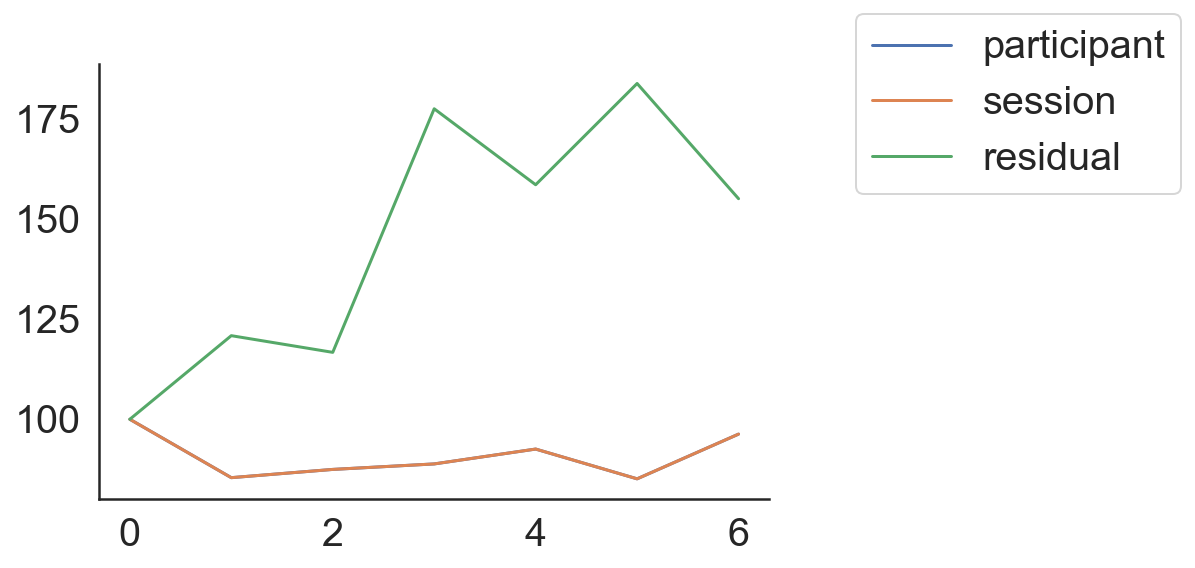

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)

### Loss

N = 97


,icc,participant,session,residual
0,0.857063,0.095764,0.003831,0.012141
1,0.836102,0.092732,0.003709,0.014469
2,0.838109,0.096726,0.003869,0.014815
3,0.824988,0.099056,0.003962,0.017052
4,0.822817,0.099522,0.003981,0.017450
5,0.813259,0.094107,0.003764,0.017845
6,0.807460,0.097353,0.003894,0.019320


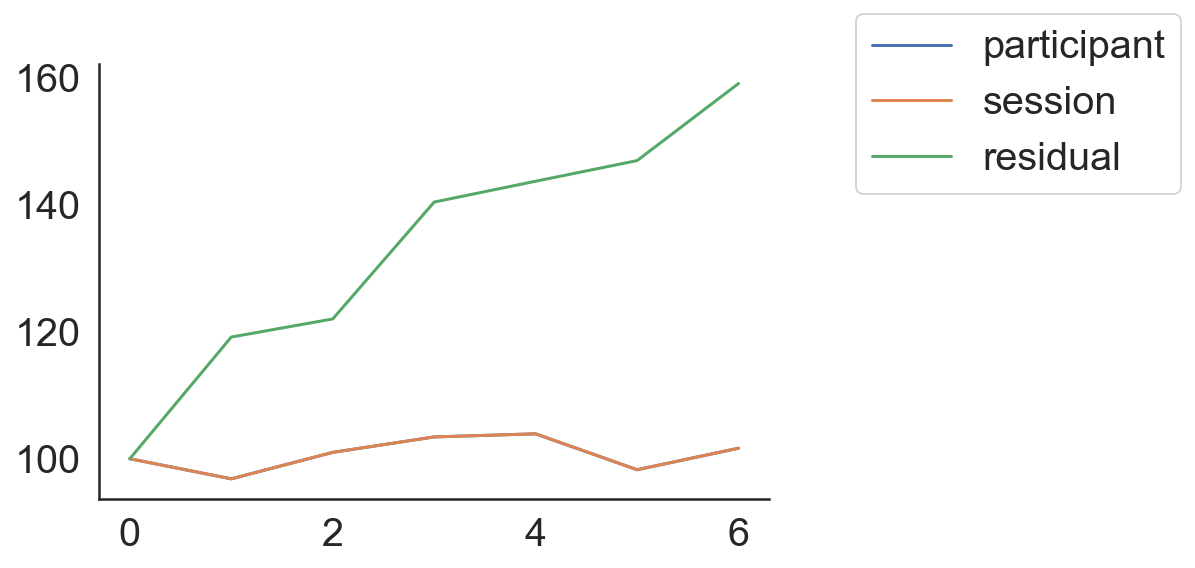

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 97


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



,icc,participant,session,residual
0,0.797126,0.050867,3.855291e-04,0.012561
1,0.774878,0.048448,2.086950e-12,0.014075
2,0.770726,0.047033,0.000000e+00,0.013991
3,0.736411,0.049974,2.371300e-09,0.017888
4,0.796243,0.052485,3.319848e-12,0.013431
5,0.727700,0.049380,0.000000e+00,0.018478
6,0.764197,0.050456,7.473638e-11,0.015569


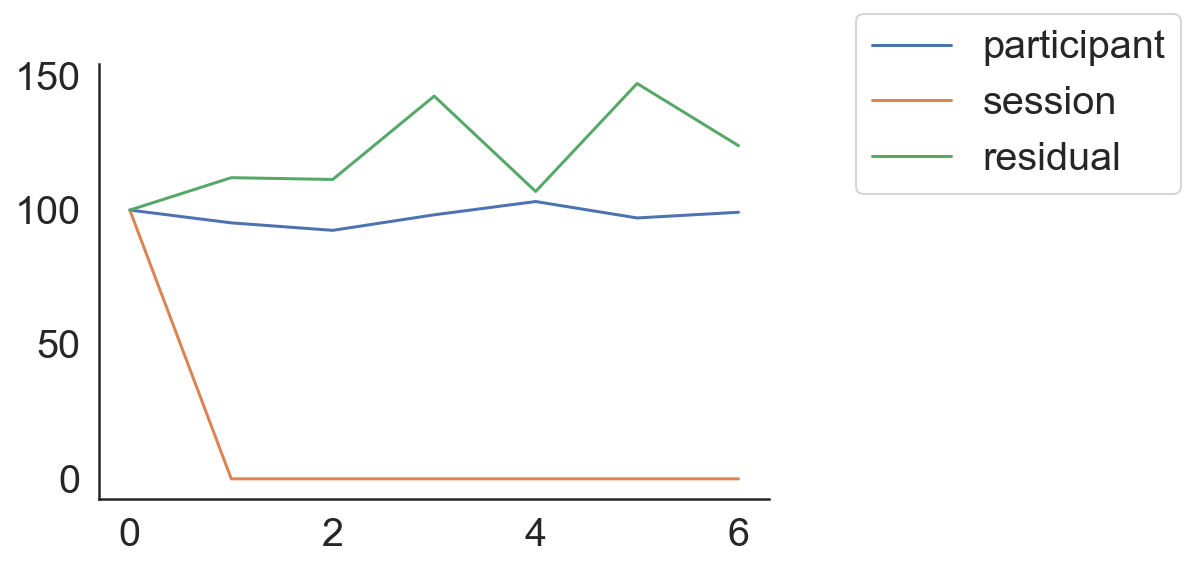

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)